In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


We need to add target column for risky or not, according to the given problem statement

In [4]:
y1=np.empty(600, dtype=object)
i=0

for value in df['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [5]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [6]:
df1 = pd.concat([df,t1],axis=1)
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


#EDA

In [7]:
le = LabelEncoder()
df1['Undergrad'] = le.fit_transform(df1['Undergrad'])
df1['Marital.Status'] = le.fit_transform(df1['Marital.Status'])
df1['Urban'] = le.fit_transform(df1['Urban'])
df1['Target'] = le.fit_transform(df1['Target'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [8]:
df1.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [9]:
df1.shape

(600, 7)

In [10]:
df1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   Target           600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


In [12]:
df1.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
Target,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


#Visualisation

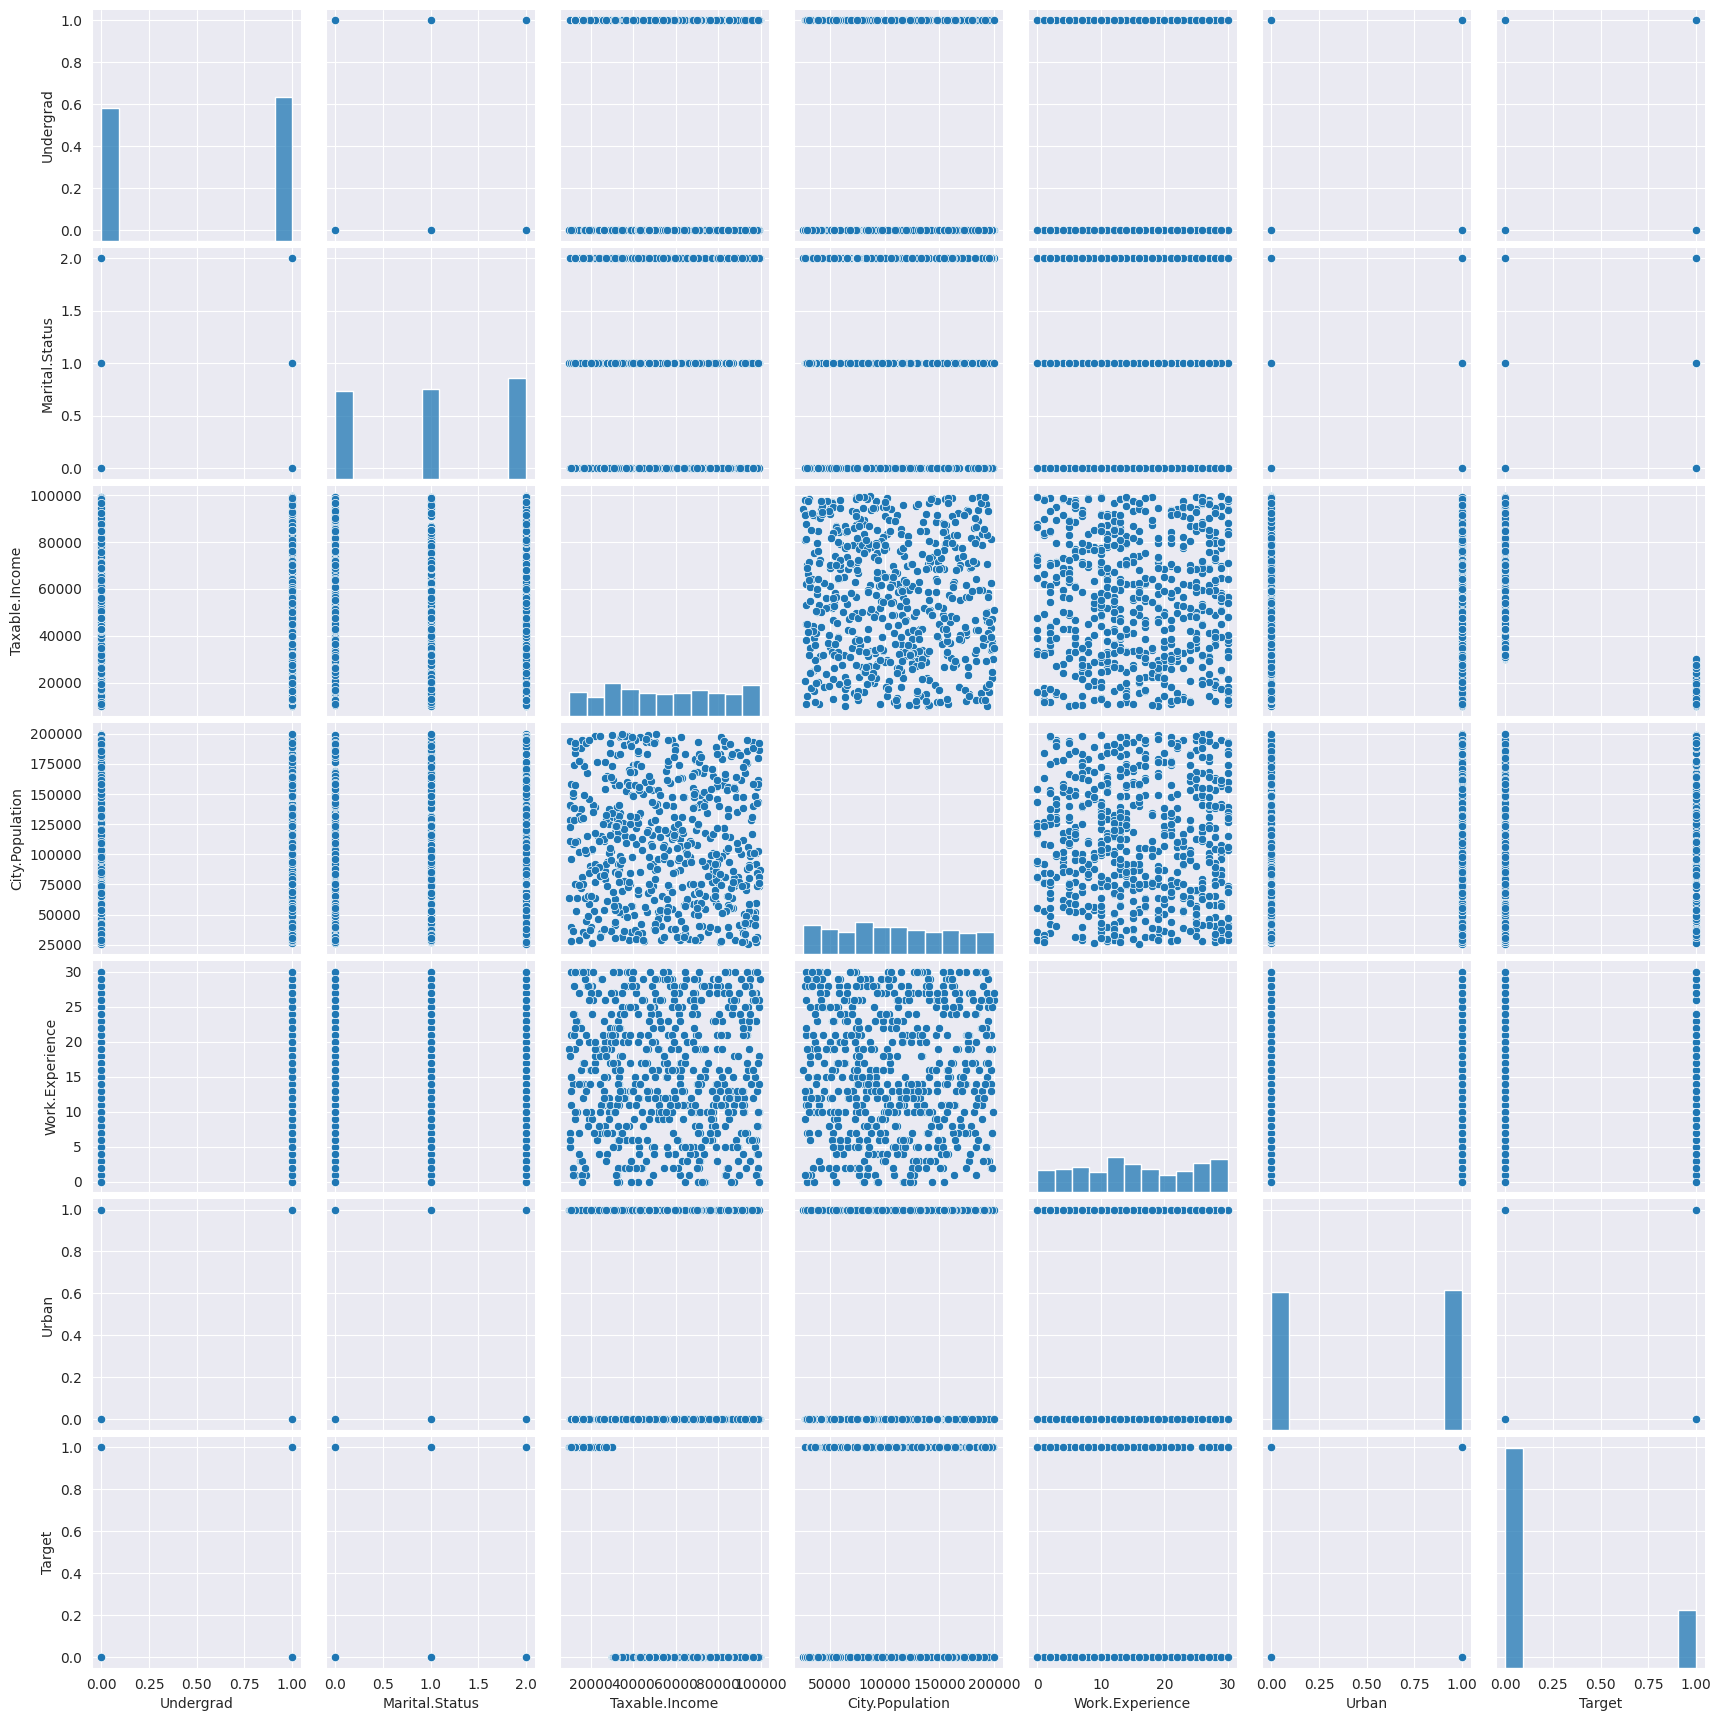

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

<Axes: >

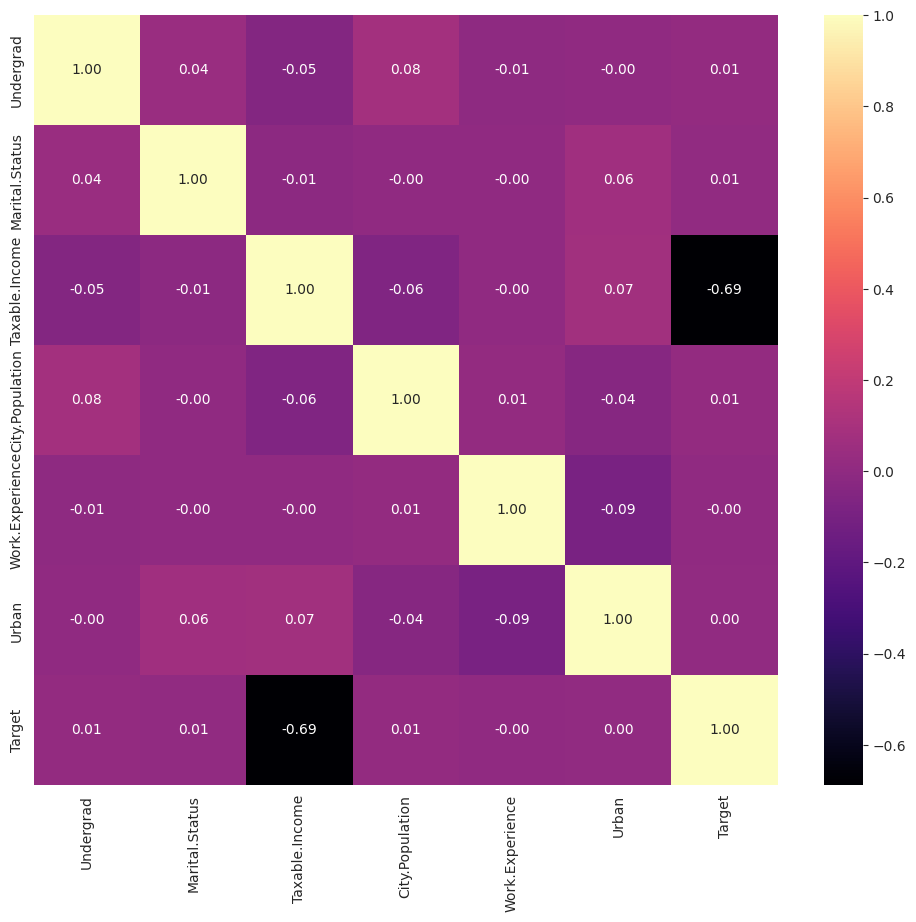

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df1.corr(),cmap='magma',annot=True,fmt='.2f')

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

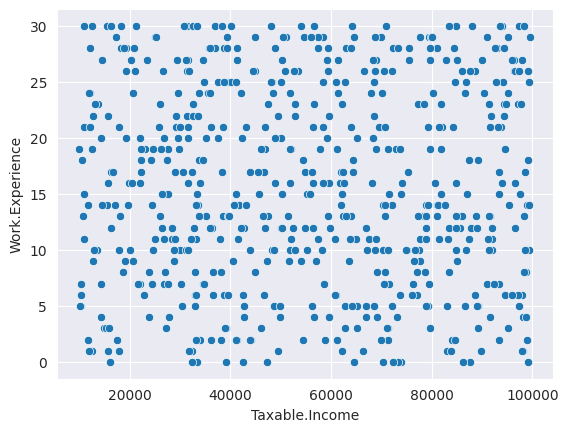

In [15]:
sns.scatterplot(x='Taxable.Income',y='Work.Experience',data=df1)

<ipython-input-16-0aea460721ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

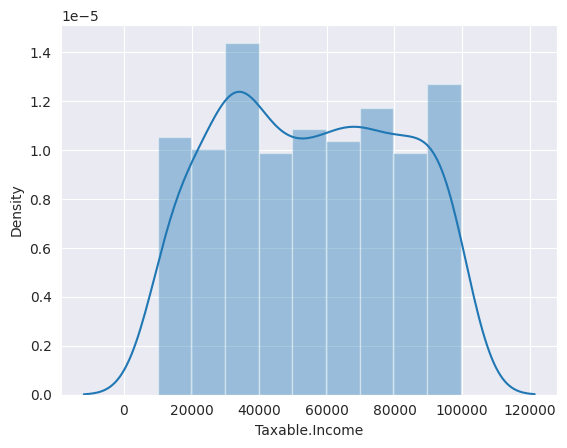

In [16]:
sns.distplot(df1['Taxable.Income'])

<ipython-input-17-5bb8464aa687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Work.Experience'])


<Axes: xlabel='Work.Experience', ylabel='Density'>

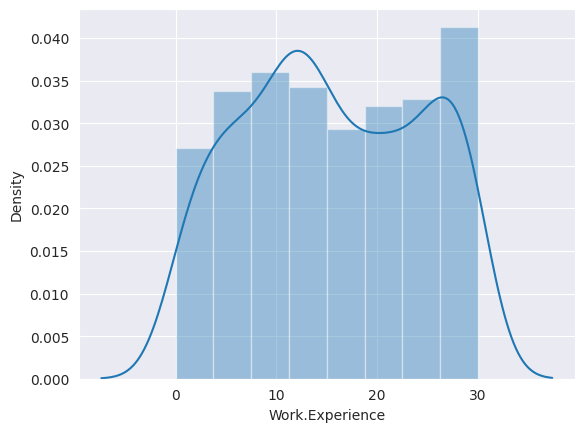

In [17]:
sns.distplot(df1['Work.Experience'])

#Random Forest Regressor

In [18]:
X = df1.iloc[:,0:5]
Y = df1.iloc[:,-1] 

In [19]:
num_trees = 83
max_features = 4

In [20]:
kfold = KFold(n_splits=8,random_state=34,shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees,max_features=max_features)

In [21]:
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.9894786997025579


The model accuracy is 98.94%